Empirical
   frobenius error: 1.7356626823264913

Ledoit-Wolf (sklearn)
   frobenius error: 1.146759396623096

GraphLasso (sklearn)


/home/jongmin/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class GraphLassoCV is deprecated; The 'GraphLassoCV' was renamed to 'GraphicalLassoCV' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)


   lam_: 0.2110501002378893
   frobenius error: 0.5269619111141075

QuicGraphicalLasso + GridSearchCV with:
   metric: log_likelihood


/home/jongmin/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/model_selection/_search.py:810: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  warnings.warn("The default of the `iid` parameter will change "


   len(cv_lams): 100
   cv-lam: 0.17073526474706913
   lam_scale_: 1.010101010101011
   lam_: 0.17245986338087807
   frobenius error: 0.4371699629234127

QuicGraphicalLasso + GridSearchCV with:
   metric: kl


/home/jongmin/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/model_selection/_search.py:810: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  warnings.warn("The default of the `iid` parameter will change "


   len(cv_lams): 100
   cv-lam: 0.17073526474706913
   lam_scale_: 1.010101010101011
   lam_: 0.17245986338087807
   frobenius error: 0.437169962779599

QuicGraphicalLasso + GridSearchCV with:
   metric: frobenius


/home/jongmin/miniconda3/envs/kmeans/lib/python3.9/site-packages/sklearn/model_selection/_search.py:810: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  warnings.warn("The default of the `iid` parameter will change "


   len(cv_lams): 100
   cv-lam: 0.1788649529057435
   lam_scale_: 1.010101010101011
   lam_: 0.1806716696017613
   frobenius error: 0.44994761883198686

QuicGraphicalLassoCV with:
   metric: log_likelihood
   len(cv_lams): 25
   lam_scale_: 1.010101010101011
   lam_: 0.22645303141080037
   frobenius error: 0.5535729237482281

QuicGraphicalLassoCV with:
   metric: kl
   len(cv_lams): 25
   lam_scale_: 1.010101010101011
   lam_: 0.2616363842960936
   frobenius error: 0.6423710587758905

QuicGraphicalLassoCV with:
   metric: frobenius
   len(cv_lams): 25
   lam_scale_: 1.010101010101011
   lam_: 0.29582268329547873
   frobenius error: 0.728415712613996

QuicGraphicalLassoEBIC with:
   mode: path
   gamma: 0
   len(path lams): 100
   lam_scale_: 1.010101010101011
   lam_: 0.25273710396813753
   error: 0.619795741717965

QuicGraphicalLassoEBIC with:
   mode: path
   gamma: 0.01
   len(path lams): 100
   lam_scale_: 1.010101010101011
   lam_: 0.25273710396813753
   error: 0.6197957412676006


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


   lam_: 0.2382555385671376

Adaptive QuicGraphicalLassoCV with:
   adaptive-method: binary
   metric: log_likelihood
   ||lam_||_2: 4.687805763852761
   frobenius error: 0.36109731613233015

Adaptive QuicGraphicalLassoCV with:
   adaptive-method: inverse
   metric: log_likelihood
   ||lam_||_2: 11.84636358144549
   frobenius error: 0.06689497314652779

Adaptive QuicGraphicalLassoCV with:
   adaptive-method: inverse_squared
   metric: log_likelihood
   ||lam_||_2: 5.361716930271241
   frobenius error: 0.44974995280608543

Adaptive QuicGraphicalLassoEBIC with:
   adaptive-method: binary
   ||lam_||_2: 4.790437683820264
   frobenius error: 0.08215934626104969

Adaptive QuicGraphicalLassoEBIC with:
   adaptive-method: inverse
   ||lam_||_2: 5.403967928764524
   frobenius error: 0.5017302519297132

Adaptive QuicGraphicalLassoEBIC with:
   adaptive-method: inverse_squared
   ||lam_||_2: 6.067477786217261
   frobenius error: 0.5114871115941007

Adaptive ModelAverage with:
   estimator: QuicG

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


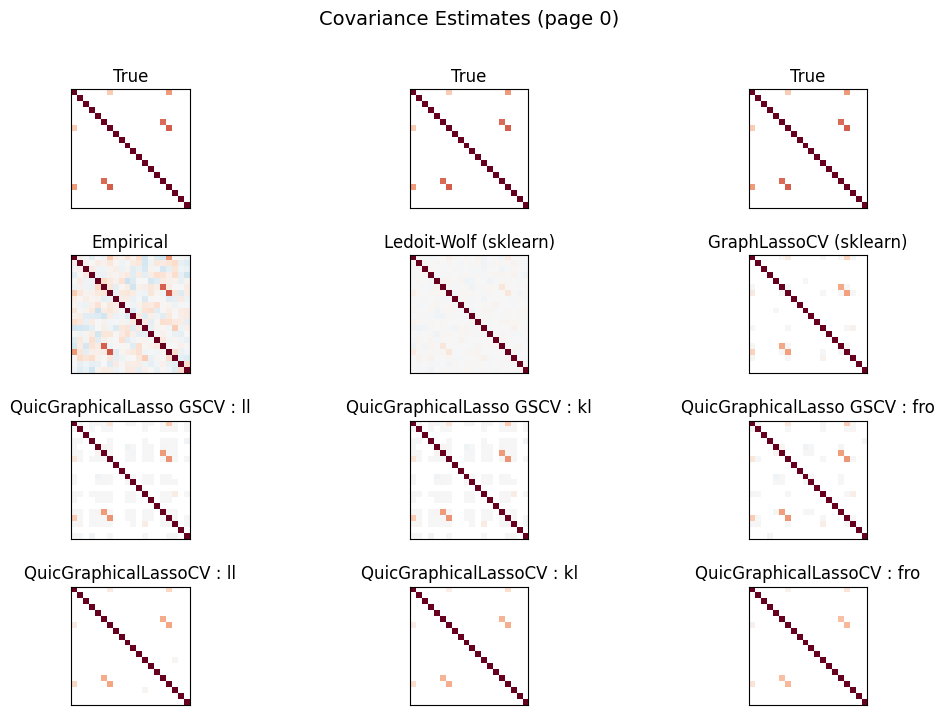

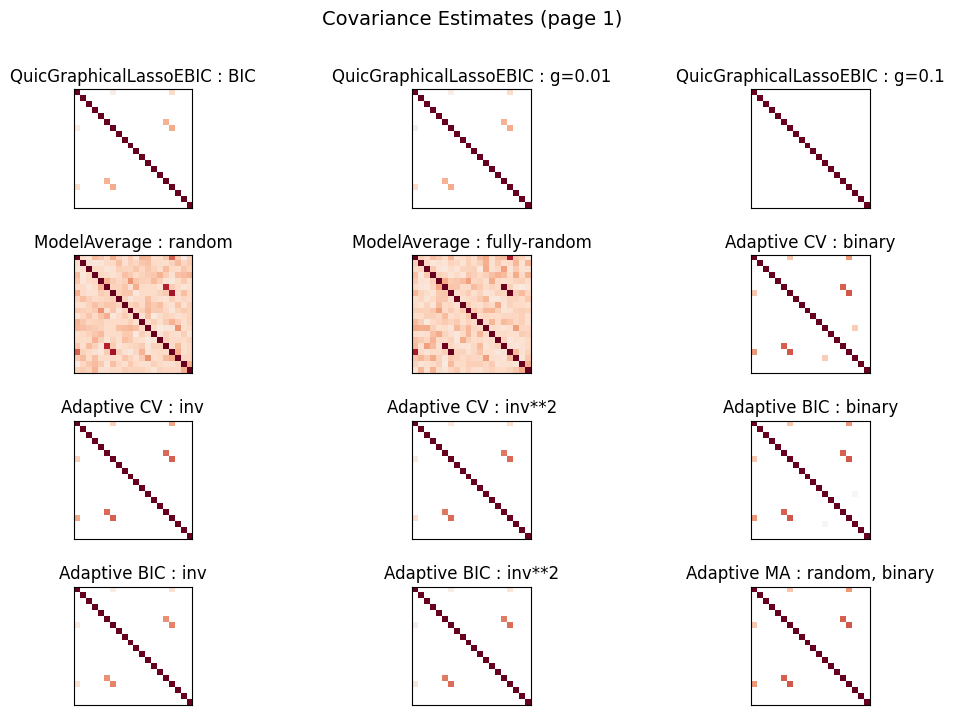

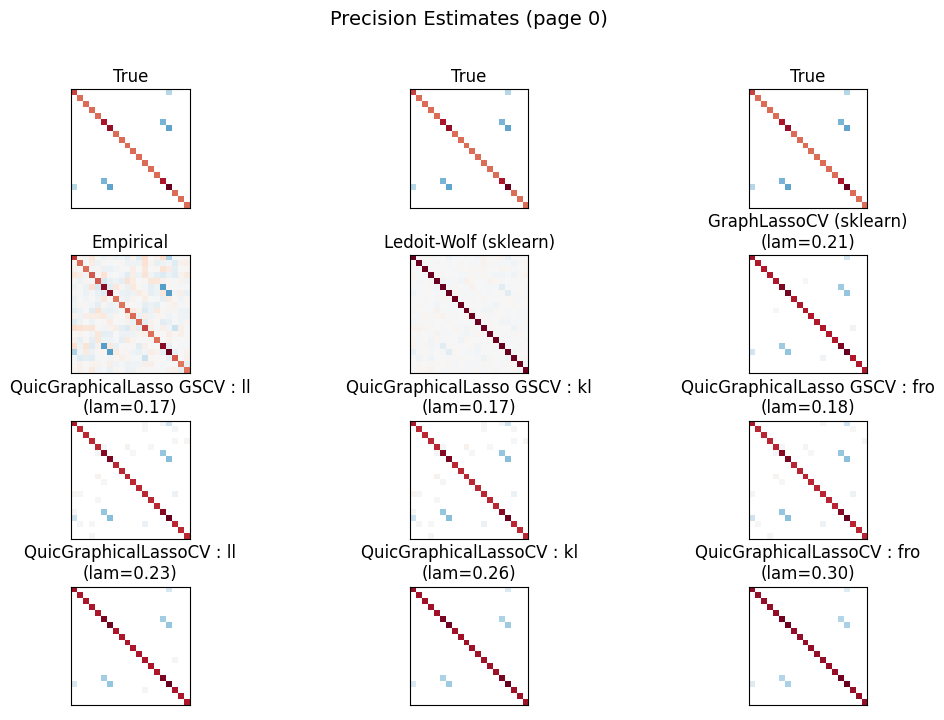

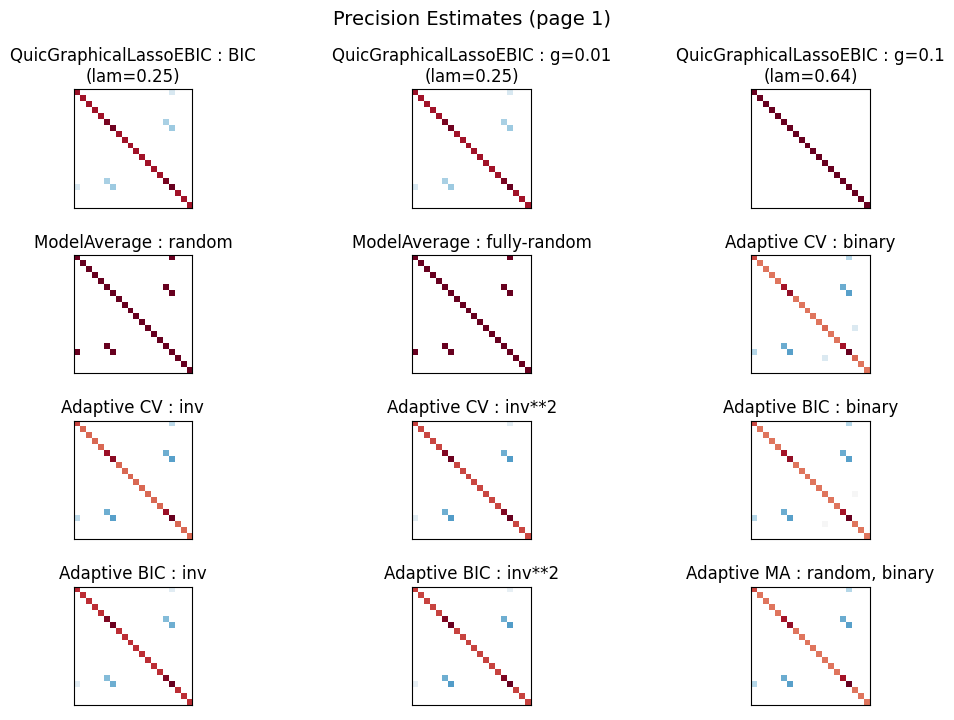

KeyboardInterrupt: Interrupted by user

In [3]:
"""
Suite of estimator comparisons
==============================

Compare inverse covariance estimators and model selection methods.

Derived from example in:
http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
"""

import sys
import numpy as np
import tabulate
import time

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.covariance import GraphLassoCV, ledoit_wolf
import matplotlib.pyplot as plt


sys.path.append("..")
sys.path.append("../inverse_covariance")
from inverse_covariance import (
    QuicGraphicalLasso,
    QuicGraphicalLassoCV,
    QuicGraphicalLassoEBIC,
    AdaptiveGraphicalLasso,
    ModelAverage,
)

plt.ion()


def r_input(val):
    if sys.version_info[0] >= 3:
        return eval(input(val))

    return raw_input(val)


def make_data(n_samples, n_features):
    rho = 0.2
    Delta = 5
    s = 10
    K=2
    Omega = np.zeros([n_features,n_features]);

    for j in range(n_features):
        for l in range(n_features):
            if j==l:
                Omega[j,l] = 1
            else if abs(j-l) ==1:
                Omega[j,l] = rho
  
    prng = np.random.RandomState(1)
 
    cov = np.linalg.inv(Omega)

    M = Delta/2/ np.sqrt( np.sum( cov[1:s,1:s]) )

    X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    X -= X.mean(axis=0)
    X /= X.std(axis=0)

    return X, cov, prec


def multiplot(named_mats, suptitle):
    num_rows = len(named_mats) / 3
    num_plots = int(np.ceil(num_rows / 4.))
    for nn in range(num_plots):
        plt.figure(figsize=(10, 8))
        plt.subplots_adjust(left=0.02, right=0.98, hspace=0.4)
        for i, item in enumerate(named_mats[nn * 4 * 3 : (nn + 1) * 4 * 3]):
            lam = None
            if len(item) == 3:
                name, this_mat, lam = item
            elif len(item) == 2:
                name, this_mat = item

            vmax = np.abs(this_mat).max()
            ax = plt.subplot(4, 3, i + 1)
            plt.imshow(
                np.ma.masked_values(this_mat, 0),
                interpolation="nearest",
                vmin=-vmax,
                vmax=vmax,
                cmap=plt.cm.RdBu_r,
            )
            plt.xticks(())
            plt.yticks(())
            if lam is None or lam == "":
                plt.title("{}".format(name))
            else:
                plt.title("{}\n(lam={:.2f})".format(name, lam))

        plt.suptitle(suptitle + " (page {})".format(nn), fontsize=14)
        plt.show()


def show_results(covs, precs):
    multiplot(covs, "Covariance Estimates")
    multiplot(precs, "Precision Estimates")


def quic_graph_lasso(X, num_folds, metric):
    """Run QuicGraphicalLasso with mode='default' and use standard scikit
    GridSearchCV to find the best lambda.

    Primarily demonstrates compatibility with existing scikit tooling.
    """
    print("QuicGraphicalLasso + GridSearchCV with:")
    print("   metric: {}".format(metric))
    search_grid = {
        "lam": np.logspace(np.log10(0.01), np.log10(1.0), num=100, endpoint=True),
        "init_method": ["cov"],
        "score_metric": [metric],
    }
    model = GridSearchCV(QuicGraphicalLasso(), search_grid, cv=num_folds, refit=True)
    model.fit(X)
    bmodel = model.best_estimator_
    print("   len(cv_lams): {}".format(len(search_grid["lam"])))
    print("   cv-lam: {}".format(model.best_params_["lam"]))
    print("   lam_scale_: {}".format(bmodel.lam_scale_))
    print("   lam_: {}".format(bmodel.lam_))
    return bmodel.covariance_, bmodel.precision_, bmodel.lam_


def quic_graph_lasso_cv(X, metric):
    """Run QuicGraphicalLassoCV on data with metric of choice.

    Compare results with GridSearchCV + quic_graph_lasso.  The number of
    lambdas tested should be much lower with similar final lam_ selected.
    """
    print("QuicGraphicalLassoCV with:")
    print("   metric: {}".format(metric))
    model = QuicGraphicalLassoCV(
        cv=2,  # cant deal w more folds at small size
        n_refinements=6,
        n_jobs=1,
        init_method="cov",
        score_metric=metric,
    )
    model.fit(X)
    print("   len(cv_lams): {}".format(len(model.cv_lams_)))
    print("   lam_scale_: {}".format(model.lam_scale_))
    print("   lam_: {}".format(model.lam_))
    return model.covariance_, model.precision_, model.lam_


def adaptive_graph_lasso(X, model_selector, method):
    """Run QuicGraphicalLassoCV or QuicGraphicalLassoEBIC as a two step adaptive fit
    with method of choice (currently: 'binary', 'inverse', 'inverse_squared').

    Compare the support and values to the model-selection estimator.
    """
    metric = "log_likelihood"
    print("Adaptive {} with:".format(model_selector))
    print("   adaptive-method: {}".format(method))
    if model_selector == "QuicGraphicalLassoCV":
        print("   metric: {}".format(metric))
        model = AdaptiveGraphicalLasso(
            estimator=QuicGraphicalLassoCV(
                cv=2,  # cant deal w more folds at small size
                n_refinements=6,
                init_method="cov",
                score_metric=metric,
            ),
            method=method,
        )

    elif model_selector == "QuicGraphicalLassoEBIC":
        model = AdaptiveGraphicalLasso(
            estimator=QuicGraphicalLassoEBIC(), method=method
        )
    model.fit(X)
    lam_norm_ = np.linalg.norm(model.estimator_.lam_)
    print("   ||lam_||_2: {}".format(lam_norm_))
    return model.estimator_.covariance_, model.estimator_.precision_, lam_norm_


def quic_graph_lasso_ebic_manual(X, gamma=0):
    """Run QuicGraphicalLasso with mode='path' and gamma; use EBIC criteria for model
    selection.

    The EBIC criteria is built into InverseCovarianceEstimator base class
    so we demonstrate those utilities here.
    """
    print("QuicGraphicalLasso (manual EBIC) with:")
    print("   mode: path")
    print("   gamma: {}".format(gamma))
    model = QuicGraphicalLasso(
        lam=1.0,
        mode="path",
        init_method="cov",
        path=np.logspace(np.log10(0.01), np.log10(1.0), num=100, endpoint=True),
    )
    model.fit(X)
    ebic_index = model.ebic_select(gamma=gamma)
    covariance_ = model.covariance_[ebic_index]
    precision_ = model.precision_[ebic_index]
    lam_ = model.lam_at_index(ebic_index)
    print("   len(path lams): {}".format(len(model.path_)))
    print("   lam_scale_: {}".format(model.lam_scale_))
    print("   lam_: {}".format(lam_))
    print("   ebic_index: {}".format(ebic_index))
    return covariance_, precision_, lam_


def quic_graph_lasso_ebic(X, gamma=0):
    """Run QuicGraphicalLassoEBIC with gamma.

    QuicGraphicalLassoEBIC is a convenience class.  Results should be identical to
    those obtained via quic_graph_lasso_ebic_manual.
    """
    print("QuicGraphicalLassoEBIC with:")
    print("   mode: path")
    print("   gamma: {}".format(gamma))
    model = QuicGraphicalLassoEBIC(lam=1.0, init_method="cov", gamma=gamma)
    model.fit(X)
    print("   len(path lams): {}".format(len(model.path_)))
    print("   lam_scale_: {}".format(model.lam_scale_))
    print("   lam_: {}".format(model.lam_))
    return model.covariance_, model.precision_, model.lam_


def model_average(X, penalization):
    """Run ModelAverage in default mode (QuicGraphicalLassoCV) to obtain proportion
    matrix.

    NOTE:  This returns precision_ proportions, not cov, prec estimates, so we
           return the raw proportions for "cov" and the threshold support
           estimate for prec.
    """
    n_trials = 100
    print("ModelAverage with:")
    print("   estimator: QuicGraphicalLasso (default)")
    print("   n_trials: {}".format(n_trials))
    print("   penalization: {}".format(penalization))

    # if penalization is random, first find a decent scalar lam_ to build
    # random perturbation matrix around.  lam doesn't matter for fully-random.
    lam = 0.5
    if penalization == "random":
        cv_model = QuicGraphicalLassoCV(
            cv=2, n_refinements=6, n_jobs=1, init_method="cov", score_metric=metric
        )
        cv_model.fit(X)
        lam = cv_model.lam_
        print("   lam: {}".format(lam))

    model = ModelAverage(
        n_trials=n_trials, penalization=penalization, lam=lam, n_jobs=1
    )
    model.fit(X)
    print("   lam_: {}".format(model.lam_))
    return model.proportion_, model.support_, model.lam_


def adaptive_model_average(X, penalization, method):
    """Run ModelAverage in default mode (QuicGraphicalLassoCV) to obtain proportion
    matrix.

    NOTE:  Only method = 'binary' really makes sense in this case.
    """
    n_trials = 100
    print("Adaptive ModelAverage with:")
    print("   estimator: QuicGraphicalLasso (default)")
    print("   n_trials: {}".format(n_trials))
    print("   penalization: {}".format(penalization))
    print("   adaptive-method: {}".format(method))

    # if penalization is random, first find a decent scalar lam_ to build
    # random perturbation matrix around. lam doesn't matter for fully-random.
    lam = 0.5
    if penalization == "random":
        cv_model = QuicGraphicalLassoCV(
            cv=2, n_refinements=6, n_jobs=1, init_method="cov", score_metric=metric
        )
        cv_model.fit(X)
        lam = cv_model.lam_
        print("   lam: {}".format(lam))

    model = AdaptiveGraphicalLasso(
        estimator=ModelAverage(
            n_trials=n_trials, penalization=penalization, lam=lam, n_jobs=1
        ),
        method=method,
    )
    model.fit(X)
    lam_norm_ = np.linalg.norm(model.estimator_.lam_)
    print("   ||lam_||_2: {}".format(lam_norm_))
    return model.estimator_.covariance_, model.estimator_.precision_, lam_norm_


def empirical(X):
    """Compute empirical covariance as baseline estimator.
    """
    print("Empirical")
    cov = np.dot(X.T, X) / n_samples
    return cov, np.linalg.inv(cov)


def graph_lasso(X, num_folds):
    """Estimate inverse covariance via scikit-learn GraphLassoCV class.
    """
    print("GraphLasso (sklearn)")
    model = GraphLassoCV(cv=num_folds)
    model.fit(X)
    print("   lam_: {}".format(model.alpha_))
    return model.covariance_, model.precision_, model.alpha_


def sk_ledoit_wolf(X):
    """Estimate inverse covariance via scikit-learn ledoit_wolf function.
    """
    print("Ledoit-Wolf (sklearn)")
    lw_cov_, _ = ledoit_wolf(X)
    lw_prec_ = np.linalg.inv(lw_cov_)
    return lw_cov_, lw_prec_


def _count_support_diff(m, m_hat):
    n_features, _ = m.shape

    m_no_diag = m.copy()
    m_no_diag[np.diag_indices(n_features)] = 0
    m_hat_no_diag = m_hat.copy()
    m_hat_no_diag[np.diag_indices(n_features)] = 0

    m_nnz = len(np.nonzero(m_no_diag.flat)[0])
    m_hat_nnz = len(np.nonzero(m_hat_no_diag.flat)[0])

    nnz_intersect = len(
        np.intersect1d(np.nonzero(m_no_diag.flat)[0], np.nonzero(m_hat_no_diag.flat)[0])
    )
    return m_nnz + m_hat_nnz - (2 * nnz_intersect)


if __name__ == "__main__":
    n_samples = 100
    n_features = 20
    cv_folds = 3

    # make data
    X, true_cov, true_prec = make_data(n_samples, n_features)

    plot_covs = [("True", true_cov), ("True", true_cov), ("True", true_cov)]
    plot_precs = [
        ("True", true_prec, ""),
        ("True", true_prec, ""),
        ("True", true_prec, ""),
    ]
    results = []

    # Empirical
    start_time = time.time()
    cov, prec = empirical(X)
    end_time = time.time()
    ctime = end_time - start_time
    name = "Empirical"
    plot_covs.append((name, cov))
    plot_precs.append((name, prec, ""))
    error = np.linalg.norm(true_cov - cov, ord="fro")
    supp_diff = _count_support_diff(true_prec, prec)
    results.append([name, error, supp_diff, ctime, ""])
    print("   frobenius error: {}".format(error))
    print("")

    # sklearn LedoitWolf
    start_time = time.time()
    cov, prec = sk_ledoit_wolf(X)
    end_time = time.time()
    ctime = end_time - start_time
    name = "Ledoit-Wolf (sklearn)"
    plot_covs.append((name, cov))
    plot_precs.append((name, prec, ""))
    error = np.linalg.norm(true_cov - cov, ord="fro")
    supp_diff = _count_support_diff(true_prec, prec)
    results.append([name, error, supp_diff, ctime, ""])
    print("   frobenius error: {}".format(error))
    print("")

    # sklearn GraphLassoCV
    start_time = time.time()
    cov, prec, lam = graph_lasso(X, cv_folds)
    end_time = time.time()
    ctime = end_time - start_time
    name = "GraphLassoCV (sklearn)"
    plot_covs.append((name, cov))
    plot_precs.append((name, prec, lam))
    error = np.linalg.norm(true_cov - cov, ord="fro")
    supp_diff = _count_support_diff(true_prec, prec)
    results.append([name, error, supp_diff, ctime, lam])
    print("   frobenius error: {}".format(error))
    print("")

    # QuicGraphicalLasso + GridSearchCV
    params = [
        ("QuicGraphicalLasso GSCV : ll", "log_likelihood"),
        ("QuicGraphicalLasso GSCV : kl", "kl"),
        ("QuicGraphicalLasso GSCV : fro", "frobenius"),
    ]
    for name, metric in params:
        start_time = time.time()
        cov, prec, lam = quic_graph_lasso(X, cv_folds, metric=metric)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, lam))
        error = np.linalg.norm(true_cov - cov, ord="fro")
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, error, supp_diff, ctime, lam])
        print("   frobenius error: {}".format(error))
        print("")

    # QuicGraphicalLassoCV
    params = [
        ("QuicGraphicalLassoCV : ll", "log_likelihood"),
        ("QuicGraphicalLassoCV : kl", "kl"),
        ("QuicGraphicalLassoCV : fro", "frobenius"),
    ]
    for name, metric in params:
        start_time = time.time()
        cov, prec, lam = quic_graph_lasso_cv(X, metric=metric)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, lam))
        error = np.linalg.norm(true_cov - cov, ord="fro")
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, error, supp_diff, ctime, lam])
        print("   frobenius error: {}".format(error))
        print("")

    # QuicGraphicalLassoEBIC
    params = [
        ("QuicGraphicalLassoEBIC : BIC", 0),
        ("QuicGraphicalLassoEBIC : g=0.01", 0.01),
        ("QuicGraphicalLassoEBIC : g=0.1", 0.1),
    ]
    for name, gamma in params:
        start_time = time.time()
        # cov, prec, lam = quic_graph_lasso_ebic_manual(X, gamma=gamma)
        cov, prec, lam = quic_graph_lasso_ebic(X, gamma=gamma)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, lam))
        error = np.linalg.norm(true_cov - cov, ord="fro")
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, error, supp_diff, ctime, lam])
        print("   error: {}".format(error))
        print("")

    # Default ModelAverage
    params = [
        ("ModelAverage : random", "random"),
        ("ModelAverage : fully-random", "fully-random"),
    ]
    for name, model_selector in params:
        start_time = time.time()
        cov, prec, lam = model_average(X, model_selector)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, ""))
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, "", supp_diff, ctime, lam])
        print("")

    # Adaptive QuicGraphicalLassoCV and QuicGraphicalLassoEBIC
    params = [
        ("Adaptive CV : binary", "QuicGraphicalLassoCV", "binary"),
        ("Adaptive CV : inv", "QuicGraphicalLassoCV", "inverse"),
        ("Adaptive CV : inv**2", "QuicGraphicalLassoCV", "inverse_squared"),
        ("Adaptive BIC : binary", "QuicGraphicalLassoEBIC", "binary"),
        ("Adaptive BIC : inv", "QuicGraphicalLassoEBIC", "inverse"),
        ("Adaptive BIC : inv**2", "QuicGraphicalLassoEBIC", "inverse_squared"),
    ]
    for name, model_selector, method in params:
        start_time = time.time()
        cov, prec, lam = adaptive_graph_lasso(X, model_selector, method)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, ""))
        error = np.linalg.norm(true_cov - cov, ord="fro")
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, error, supp_diff, ctime, ""])
        print("   frobenius error: {}".format(error))
        print("")

    # Adaptive ModelAverage
    params = [("Adaptive MA : random, binary", "random", "binary")]
    for name, model_selector, method in params:
        start_time = time.time()
        cov, prec, lam = adaptive_model_average(X, model_selector, method)
        end_time = time.time()
        ctime = end_time - start_time
        plot_covs.append((name, cov))
        plot_precs.append((name, prec, ""))
        error = np.linalg.norm(true_cov - cov, ord="fro")
        supp_diff = _count_support_diff(true_prec, prec)
        results.append([name, error, supp_diff, ctime, ""])
        print("   frobenius error: {}".format(error))
        print("")

    # tabulate errors
    print(
        tabulate.tabulate(
            results,
            headers=[
                "Estimator",
                "Error (Frobenius)",
                "Support Diff",
                "Time",
                "Lambda",
            ],
            tablefmt="pipe",
        )
    )
    print("")

    # display results
    show_results(plot_covs, plot_precs)
    r_input("Press any key to exit...")